In [ ]:
"""
@author: vaaruni
"""

'\n@author: vaaruni\n'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#load cleaned avg. marriage age and birth rate datasets
mrg_df = pd.read_json('cleanedMrgdata.json')
brate_df = pd.read_json('cleanedBirthRate.json')

In [ ]:
avg_brate = brate_df.groupby(['Country'])['Birth rate'].mean()
avg_brate = avg_brate.reset_index(name = 'Avg. Birth rate')

In [ ]:
mrg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   216 non-null    object 
 1   Avg. age  216 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.5+ KB


In [ ]:
# To find the missing countries in Birth rate data set
for a in list(mrg_df['Country']):
  if(a in list(avg_brate['Country'])):
    pass
  else:
    print(a)

Anguilla
Aruba
Bermuda
Cayman Islands
Channel Islands
Faeroe Islands
Falkland Islands
French Guiana
French Polynesia
Gibraltar
Greenland
Hong Kong
Isle of Man
Kosovo
Liechtenstein
Macao
Mayotte
Monaco
Montserrat
Netherlands Antilles
New Caledonia
Northern Mariana Islands
Palestine
Puerto Rico
Reunion
Sint Maarten (Dutch part)
Tokelau
Turks and Caicos Islands
United Kingdom
United States of Virgin Islands
Wallis and Futuna


In [ ]:
#merging birth rate and marriage age dfs
brate_mrg = pd.merge(mrg_df, avg_brate, on='Country')

In [ ]:
brate_mrg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 184
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          185 non-null    object 
 1   Avg. age         185 non-null    float64
 2   Avg. Birth rate  185 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.8+ KB


In [ ]:
#checking the maximum and minimum of the average marriage age
brate_mrg['Avg. age'].describe()


count    185.000000
mean      24.816216
std        3.772146
min       17.200001
25%       21.900000
50%       24.000000
75%       27.799999
max       33.799999
Name: Avg. age, dtype: float64

Minimum avg. marriage age is 17 and maximum avg. marriage age is 33. The mean age of marriage is 24. There seems to be no country with an average marriage age less than 16, indicating that child marriages are not the norm anywhere.

In [ ]:
#correlation matrix
corrM = brate_mrg.corr()
print(corrM)

#By descending order of average marriage age
amr_br_df=(brate_mrg[['Avg. age','Avg. Birth rate']])
print(amr_br_df.sort_values(by=['Avg. age'], ascending=False))



                 Avg. age  Avg. Birth rate
Avg. age         1.000000        -0.671078
Avg. Birth rate -0.671078         1.000000
      Avg. age  Avg. Birth rate
159  33.799999         2.648718
155  33.200001         4.766667
48   32.500000        25.972727
74   32.400002         5.584211
46   32.400002         1.837500
..         ...              ...
100  18.799999        87.704545
31   18.799999        87.586957
12   18.799999        62.342424
30   17.299999       106.088235
118  17.200001       114.247059

[185 rows x 2 columns]


Correlation:  -0.6710778920514254


Text(0, 0.5, 'Avg. Adolescent Birth rate')

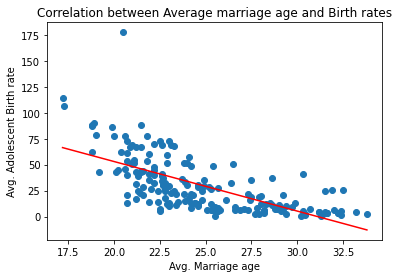

In [ ]:
x=brate_mrg['Avg. age']
y=brate_mrg['Avg. Birth rate']
correlation = y.corr(x)
print("Correlation: ",correlation)

# plotting the data
plt.scatter(x, y)
  
# This will fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')

# adds the title
plt.title('Correlation between Average marriage age and Birth rates')
  

# Labelling axes
plt.xlabel('Avg. Marriage age')
plt.ylabel('Avg. Adolescent Birth rate')

Negative correlation: The higher the average marriage age in a country, the lower is its average adolescent birth rate. Indicates that as people tend to marry later, adolescent births are low in a country.

Checking for the maximum outlier in the graph:

In [ ]:
#finding the country with the highest birth rate
max_br = np.array(brate_mrg.loc[brate_mrg['Avg. Birth rate'].idxmax()])
print(max_br)


['Equatorial Guinea' 20.5 177.5]


Equatorial Guinea has the maximum birth rate. Can it be verified as an outlier?



In [ ]:
#Calculating mean and standard deviation of avg. birth rate

mean = np.mean(brate_mrg['Avg. Birth rate'])
std = np.std(brate_mrg['Avg. Birth rate'])
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is 30.04069495718179
std. deviation is 26.772082666468265


Z score for Outlier Detection: A Z score of more than 3 standard deviations indicates an outlier

In [ ]:
threshold = 3
outlier = []
for i in (brate_mrg['Avg. Birth rate']):
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is [177.5, 114.24705882352941]


There are 2 outliers. The country with an average adolescent birth rate of 177.5 has already been identified as Equatorial Guinea. Which country is the other outlier?

In [ ]:
print(brate_mrg.loc[brate_mrg['Avg. Birth rate'] == 114.24705882352941])

    Country   Avg. age  Avg. Birth rate
118   Niger  17.200001       114.247059


Niger is the other outlier. Both the outliers are different from 99% of the average birth rate data points.


From the correlation graph, it is visible that Equatorial Guinea as an outlier, doesn't adhere to the observed negative correlation. The country has an average marriage age of 20 but has the highest average adolescent birth rate, unlike the countries of the same category.